## Look Elsewhere Effect in 2-d

Kyle Cranmer, Nov 19, 2015

Based on
*Estimating the significance of a signal in a multi-dimensional search* by  Ofer Vitells and Eilam Gross http://arxiv.org/pdf/1105.4355v1.pdf

This is for the special case of a likelihood function of the form 
$L(\mu, \nu_1, \nu_2)$ where $\mu$ is a single parameter of interest and
$\nu_1,\nu_2$ are two nuisance parameters that are not identified under the null.
For example, $\mu$ is the signal strength of a new particle and $\nu_1,\nu_2$ are the
unknown mass and width of the new particle. Under the null hypothesis, those parameters 
don't mean anything... aka they "are not identified under the null" in the statistics jargon.
This introduces a 2-d look elsewhere effect.

The LEE correction in this case is based on 

\begin{equation}
E[ \phi(A_u) ] = P(\chi^2_1 > u) + e^{-u/2} (N_1 + \sqrt{u} N_2) \,
\end{equation}
where 
   * $A_u$ is the 'excursion set above level $u$ (eg. the set of parameter points in $(\nu_1,\nu_2)$ that have a -2 log-likelihood ratio greater than $u$ )
   * $\phi(A_u)$ is the Euler characteristic of the excursion set
   * $E[ \phi(A_u) ]$ is the expectation of the Euler characteristic of those excursion sets under the null
   * $P(\chi^2_1 > u)$ is the standard chi-square probability 
   * and $N_1$ and $N_2$ are two coefficients that characterize the chi-square random field.
   
### structure of the notebook

The notebook is broken into two parts.
  * calculation of $N_1$ and $N_2$ based on $E[ \phi(A_u) ]$ at two different levels $u_1$ and $u_2$
  * calculation of LEE-corrected 'global p-value' given $N_1,N_2$

In [1]:
%pylab inline --no-import-all


Populating the interactive namespace from numpy and matplotlib


In [2]:
from lee2d import *

### Test numerical solution to $N_1, N_2$  from the example in the paper

Usage: calculate n1,n2 based on expected value of Euler characteristic (calculated from toy Monte Carlo) at two different levels u1, u2. For example: 
   * $u_1=0$ with $E[ \phi(A_{u=u_1})]=33.5 $ 
   * $u_2=1$ with $E[ \phi(A_{u=u_2})]=94.6 $

would lead to a call like this

In [3]:
# An example from the paper
n1, n2 = get_coefficients(u1=0., u2=1., exp_phi_1=33.5, exp_phi_2=94.6)
print n1, n2
#small difference wrt the paper, where n2 = 123

33.5 121.343467521


[]

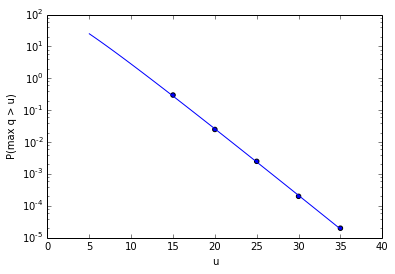

In [4]:
# reproduce Fig 5 from paper (the markers are read by eye)
u = np.linspace(5,35,100)
global_p = global_pvalue(u,n1,n2)
plt.plot(u, global_p)
plt.scatter(35,2.E-5) #from Fig5
plt.scatter(30,2.E-4) #from Fig5
plt.scatter(25,2.5E-3) #from Fig5
plt.scatter(20,2.5E-2) #from Fig5
plt.scatter(15,.3) #from Fig5
plt.xlabel('u')
plt.ylabel('P(max q > u)')
plt.semilogy()

### Check Euler characteristic from Fig 3 example in the paper

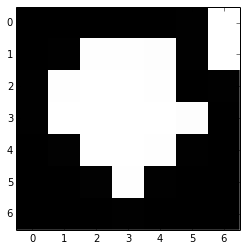

In [5]:
#create Fig 3 of http://arxiv.org/pdf/1105.4355v1.pdf
a = np.zeros((7,7))
a[1,2]=a[1,3]=a[2,1]=a[2,2]=a[2,3]=a[2,4]=1
a[3,1]=a[3,2]=a[3,3]=a[3,4]=a[3,5]=1
a[4,1]=a[4,2]=a[4,3]=a[4,4]=1
a[5,3]=1
a[6,0]=a[6,1]=1
a=a.T
plt.imshow(a,cmap='gray',interpolation='none')

In [6]:
#should be 2
calculate_euler_characteristic(a) 

18-23+7=2


2

### Try a big matrix

In [7]:
#Fully filled, should be 1
randMatrix = np.zeros((100,100))+1
calculate_euler_characteristic(randMatrix)

10000-19800+9801=1


1

9900-19501+9603=2


2

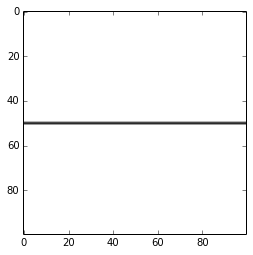

In [9]:
# split in half vertically, should be 2
randMatrix[50,:]=0
plt.imshow(randMatrix,cmap='gray')
calculate_euler_characteristic(randMatrix)

9702-18911+9215=6


6

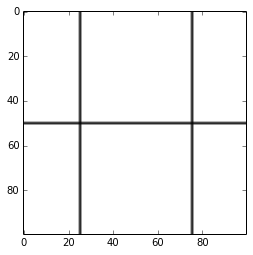

In [10]:
#split in half horizontally twice, should be 6
randMatrix[:,25]=0
randMatrix[:,75]=0
plt.imshow(randMatrix,cmap='gray')
calculate_euler_characteristic(randMatrix)

9687-18873+9191=5


5

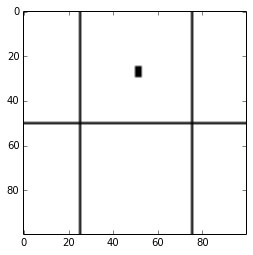

In [11]:
#remove a hole from middle of one, should be 5
randMatrix[25:30,50:53]=0
plt.imshow(randMatrix,cmap='gray')
calculate_euler_characteristic(randMatrix)